# <span style="color: #005eb8; letter-spacing: 2px">Employee Attrition Analysis</span>
<span style="color: #63666a; font-size: 1.2em">Alistair Garioch, March 2018</span>
### <span style="color: #63666a;">Contents</span>
- [Problem Statement](#problem-statement)
- [Potential Models](#potential-models)
- [Import Packages](#import-packages)
- [Import Dataset](#import-dataset)
- [EDA Plan](#eda-plan)
- [Literature Review](#literature-review)
- [Data Dictionary](#data-dictionary)
- [EDA Summary](#eda)
- [Feature Matrix](#feature-matrix)
- [Import Models](#import-models)
- [Baseline Model](#baseline-model)
- [Initial Model](#initial-model)
- [Results Summary](#results-summary)
- [Parameter Tuning](#parameter-tuning)

<a id="problem-statement"></a>
### <span style="color: #63666a">Problem Statement</span>

Unwanted <b>attrition (churn) is a significant cost for businesses</b> due to the loss of talent & knowledge and the subsequent costs of hiring and training new employees to fill the open positions.

The aim of this analysis is to define a model that uses information known to the HR department about an employee to <b>predict whether they are likley to leave the company</b>.

The hypothesis is that employment factors such as years in the role, level of compensation, workload & satisfaction with manager are <b>good predictors of  attrition</b>.

The model can also help the HR team to <b>understand the correlation between different employment factors and attrition</b> so they can work to reduce churn e.g. deciding whether a dollar invested in more training or a dollar invested in salary is more likley to reduce attrition  

<a id="potential-models"></a>
### <span style="color: #63666a">Potential Models</span>

The following modelling approaches may be effective:
- Decision tree
- Random forest
- Logistic regression
- K-means clustering
- Support Vector Machine
- Naive Bayes

I plan to test several of the models above starting with the simpler models.

<a id="import-packages"></a>
### <span style="color: #63666a">Import Packages For EDA</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

plt.style.use('seaborn-notebook')
%matplotlib inline 

<a id="import-dataset"></a>
### <span style="color: #63666a">Import Dataset</span>
This is a fictional employee attrition dataset created by the IBM Watson team to test the performance of machine learning models on predicting & understanding the drivers of attrition.
It has been used in several Kaggle competitions.
- Source: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/data

In [2]:
# Read data
data = pd.read_csv('raw-data/HR-Employee-Attrition.csv')
data.shape

(1470, 35)

To be conservative, I will use both a train test split (90:10) and 3 fold cross validation when training/evaluating the model.
I will only use the training dataset for EDA and initial modelling (testing interim models with cross-validation). Once I have a decided on a final model I will use the test dataset to test the accuracy.

In [3]:
# Create train-test split
data_train, data_test = train_test_split(data, test_size=0.1, random_state=42)
print(f"Train: {data_train.shape}")
print(f"Test:  {data_test.shape}")

Train: (1323, 35)
Test:  (147, 35)


In [4]:
# Save train-test data sets as seperate csv files
data_train.to_csv('train-test-data/Attrition-Train.csv')
data_train.to_csv('train-test-data/Attrition-Test.csv')

<a id="eda-plan"></a>
### <span style="color: #63666a">EDA Plan</span>

- <b>Literature:</b> Review relevant models or papers on attrition prediction
- <b>Defintions:</b> Read data dictionary, understand features & target
- <b>Statistics:</b> Review descriptive statistics for all variables
- <b>Distribution:</b> Understand distribution of key variables and review any outliers
- <b>Data Quality:</b> Check for any missing variables and drop rows or impute values
- <b>Categorical features:</b> Create dummy variables for key categorical features
- <b>Relationships:</b> Understand correlation/relationships between key variables
- <b>Feature engineering:</b> create additional features not present in raw data if required
- <b>Other issues:</b> Drop any features that could cause multi-collinearity or other issues
- <b>Feature selection:</b> Create an initial feature matrix for preliminary modelling

<a id="literature"></a>
### <span style="color:#63666a">Literature Review</span>

*Prediction of Employee Turnover in Organizations using Machine Learning Algorithms* (Pankaj Ajit)
https://thesai.org/Downloads/IJARAI/Volume5No9/Paper_4-Prediction_of_Employee_Turnover_in_Organizations.pdf
Paper discussing the effectiveness of Extreme Gradient Boosting approaches in attrition forecasting models. Typically deal effectively with the messy data found in HR systems.
In a meta-analytic review of turnover (attrition) studies it was found that age, tenure, pay and overall job satisfaction are the best predictors.

*HR ANALYTICS: USING MACHINE LEARNING TO PREDICT EMPLOYEE TURNOVER* (Matt Dancho)
http://www.business-science.io/business/2017/09/18/hr_employee_attrition.html
Analysis of the same data set examined in this notebook. Used the autoML algorithm from H2O.ai to  automatically tests a number of different ensemble models & parameters, resulting in very good results: 87% accuracy and 62% recall
The model found OverTime and Training to be important features


*Employee Attrition Analysis* (Maggie Zou)
https://nycdatascience.com/blog/student-works/employee-retention-analysis-capstone/
Analysis of another Kaggle dataset (14,999 rows of employee data with 10 features). Tried 8 different model types, Random Forrest, Gradient Boosting, SVM and AdaBoost gave the best results - logistic regression & naive bayes performed poorly.

*Using Machine Learning to predict attrition in HR* (Manish Ahuja)
https://www.kaggle.com/ahujam/using-machine-learning-to-predict-attrition-in-hr#
Kaggle competition entry on 15,000 row & 10 feature dataset. Achieved best results with ensemble methogs, in particular Gradient Boosting. 


Across the papers reviewed ensemble methods such as random forest, gradient boosting and adaboost typically performed well, while logistic regression and knn approaches typically performed poorly.

<a id="data-dictionary"></a>
### <span style="color:#63666a">Data Dictionary</span>

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 915 to 1126
Data columns (total 35 columns):
Age                         1323 non-null int64
Attrition                   1323 non-null object
BusinessTravel              1323 non-null object
DailyRate                   1323 non-null int64
Department                  1323 non-null object
DistanceFromHome            1323 non-null int64
Education                   1323 non-null int64
EducationField              1323 non-null object
EmployeeCount               1323 non-null int64
EmployeeNumber              1323 non-null int64
EnvironmentSatisfaction     1323 non-null int64
Gender                      1323 non-null object
HourlyRate                  1323 non-null int64
JobInvolvement              1323 non-null int64
JobLevel                    1323 non-null int64
JobRole                     1323 non-null object
JobSatisfaction             1323 non-null int64
MaritalStatus               1323 non-null object
MonthlyIncome       

The data dictionary provided explains the meanings of 7 ordinal variable using label encoding. 
There is no data dictionary for the other 28 features.

This data set has 35 variables including the target:
- Age: employee's age in years - num
- Attrition: whether employee left the organization or not ('yes' or 'no') - str
- BusinessTravel: frequency of travel ('Non_Travel', 'Travel_Rarely', 'Travel_Frequently') - str
- DailyRate: - num
- Department: employee's function ('Research & development', 'Sales', 'Human Resources') - str 
- DistanceFromHome: miles between home & office - num
- Education: categories (1: 'Below College' to 5: 'Doctorate' , see Data-Definitions-Table.xlsx) - num
- EducationField: degree subject ('Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other') -str
- EmployeeCount: unique row identifier
- EnvironmentSatisfaction: survey response(1: Low, 2: Medium, 3: High, 4: Very High) - num
- Gender: 'Male' or 'Female' - str
- HourlyRate: - num
- JobInvolvement: survey ratings (see EnvironmentSatisfaction) - num
- JobLevel: position seniority (1-5) - num
- JobRole: type of job (9 types) - str
- JobSatisfaction: 1: 'Low' - 4: 'Very High' - num
- MaritalStatus: 'Married', 'Single', 'Divorced' - str
- MonthlyIncome: dollar income per month - num
- MonthlyRate: - num
- NumCompanies: companies worked for in career - num
- Over18: 'Y' all employees are over 18 - str
- OverTime: does the employee work overtime 'No' or 'Yes' - str
- PercentSalaryHike: salary raise vs. prior period - num
- PerformanceRating: 1:Low to 4: Outsanding - num
- RelationshipSatisfaction: survey ratings (see above) - num
- StandardHours: normal hours worked - num
- StockOptionLevel: - num
- TotalWorkingYears: total years in work - num
- TrainingTimesLastYear: times employee attended training last year - num
- WorkLifeBalance: survey ratings (see above) - num
- YearsAtCompany: years at current company - num
- YearsInCurrentRole: years in current role - num
- YearsSinceLastPromotion: years since promotion - num
- YearsWithCurrManager: years working for existing manager - num

<a id="eda"></a>
### <span style="color: #63666a">EDA</span>

In [6]:
# Check for missing values
data_train.isnull().values.any()

False

There are no null values in the data

In [7]:
# Review % distribution of categorical variables
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 
                       'Education', 'EducationField', 'EnvironmentSatisfaction', 
                       'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 
                       'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 
                       'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']

for col in data_train[categorical_columns].columns:
    print()
    print(data_train[col].value_counts(normalize=True))


No     0.838246
Yes    0.161754
Name: Attrition, dtype: float64

Travel_Rarely        0.708239
Travel_Frequently    0.189720
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64

Research & Development    0.656085
Sales                     0.301587
Human Resources           0.042328
Name: Department, dtype: float64

3    0.393046
4    0.267574
2    0.186697
1    0.120937
5    0.031746
Name: Education, dtype: float64

Life Sciences       0.416478
Medical             0.309902
Marketing           0.105820
Technical Degree    0.089191
Other               0.059713
Human Resources     0.018896
Name: EducationField, dtype: float64

3    0.305367
4    0.299320
2    0.201814
1    0.193500
Name: EnvironmentSatisfaction, dtype: float64

Male      0.605442
Female    0.394558
Name: Gender, dtype: float64

3    0.593348
2    0.255480
4    0.093726
1    0.057445
Name: JobInvolvement, dtype: float64

1    0.379441
2    0.358277
3    0.143613
4    0.071051
5    0.047619
Name: JobLevel, d

In [8]:
# Descriptive statistics for non-categorical/ordinal numerical variables

print(data_train.drop(labels=categorical_columns, axis=1).describe())

               Age    DailyRate  DistanceFromHome  EmployeeCount  \
count  1323.000000  1323.000000       1323.000000         1323.0   
mean     36.900227   797.502646          9.203326            1.0   
std       9.155937   404.992582          8.120886            0.0   
min      18.000000   102.000000          1.000000            1.0   
25%      30.000000   460.000000          2.000000            1.0   
50%      36.000000   796.000000          7.000000            1.0   
75%      43.000000  1153.500000         14.000000            1.0   
max      60.000000  1498.000000         29.000000            1.0   

       EmployeeNumber   HourlyRate  MonthlyIncome   MonthlyRate  \
count     1323.000000  1323.000000    1323.000000   1323.000000   
mean      1031.274376    66.183673    6455.884354  14261.224490   
std        604.663120    20.309861    4730.187266   7081.301311   
min          1.000000    30.000000    1009.000000   2094.000000   
25%        495.500000    48.000000    2865.000000   

In [9]:
# Scale features to mean 0 and 1 stdv to make it easy to visually check for outliers on one box plot
from sklearn.preprocessing import scale

scaled = scale(data_train.drop(categorical_columns, axis=1))
scaled_cols = data_train.drop(categorical_columns, axis=1).columns

dfscaled = pd.DataFrame(scaled, columns=scaled_cols)

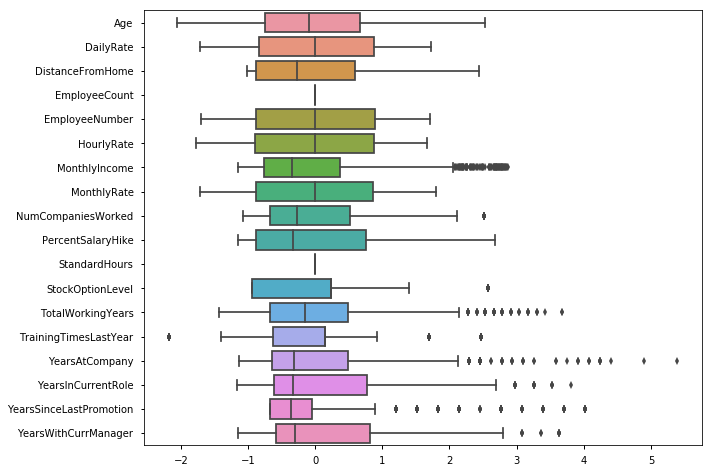

In [10]:
plt.figure(figsize=(10,8))
sns.boxplot(data=dfscaled, orient='h')

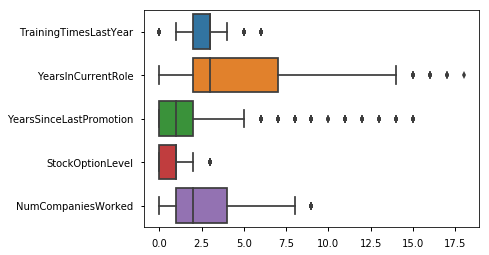

In [11]:
# Review outliers in normal units
sns.boxplot(data=data_train[['TrainingTimesLastYear', 'YearsInCurrentRole', 
                             'YearsSinceLastPromotion','StockOptionLevel', 'NumCompaniesWorked']], orient="h")

There do not appear to be any errors in the data, so I won't remove any outliers from the data at this stage. I will however keep them in mind for any models sensitive to outliers e.g. logistic regression.

Some features have no explanatory power and can be removed:
- All employees over 18
- All employee counts = 1
- Standard hours for all employees is 80
- Employee number is just a row identifier

In [12]:
# Drop Over18, StandardHours, EmployeeCount, EmployeeNumber
dftrain = data_train.drop(labels=['Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber'], axis=1)

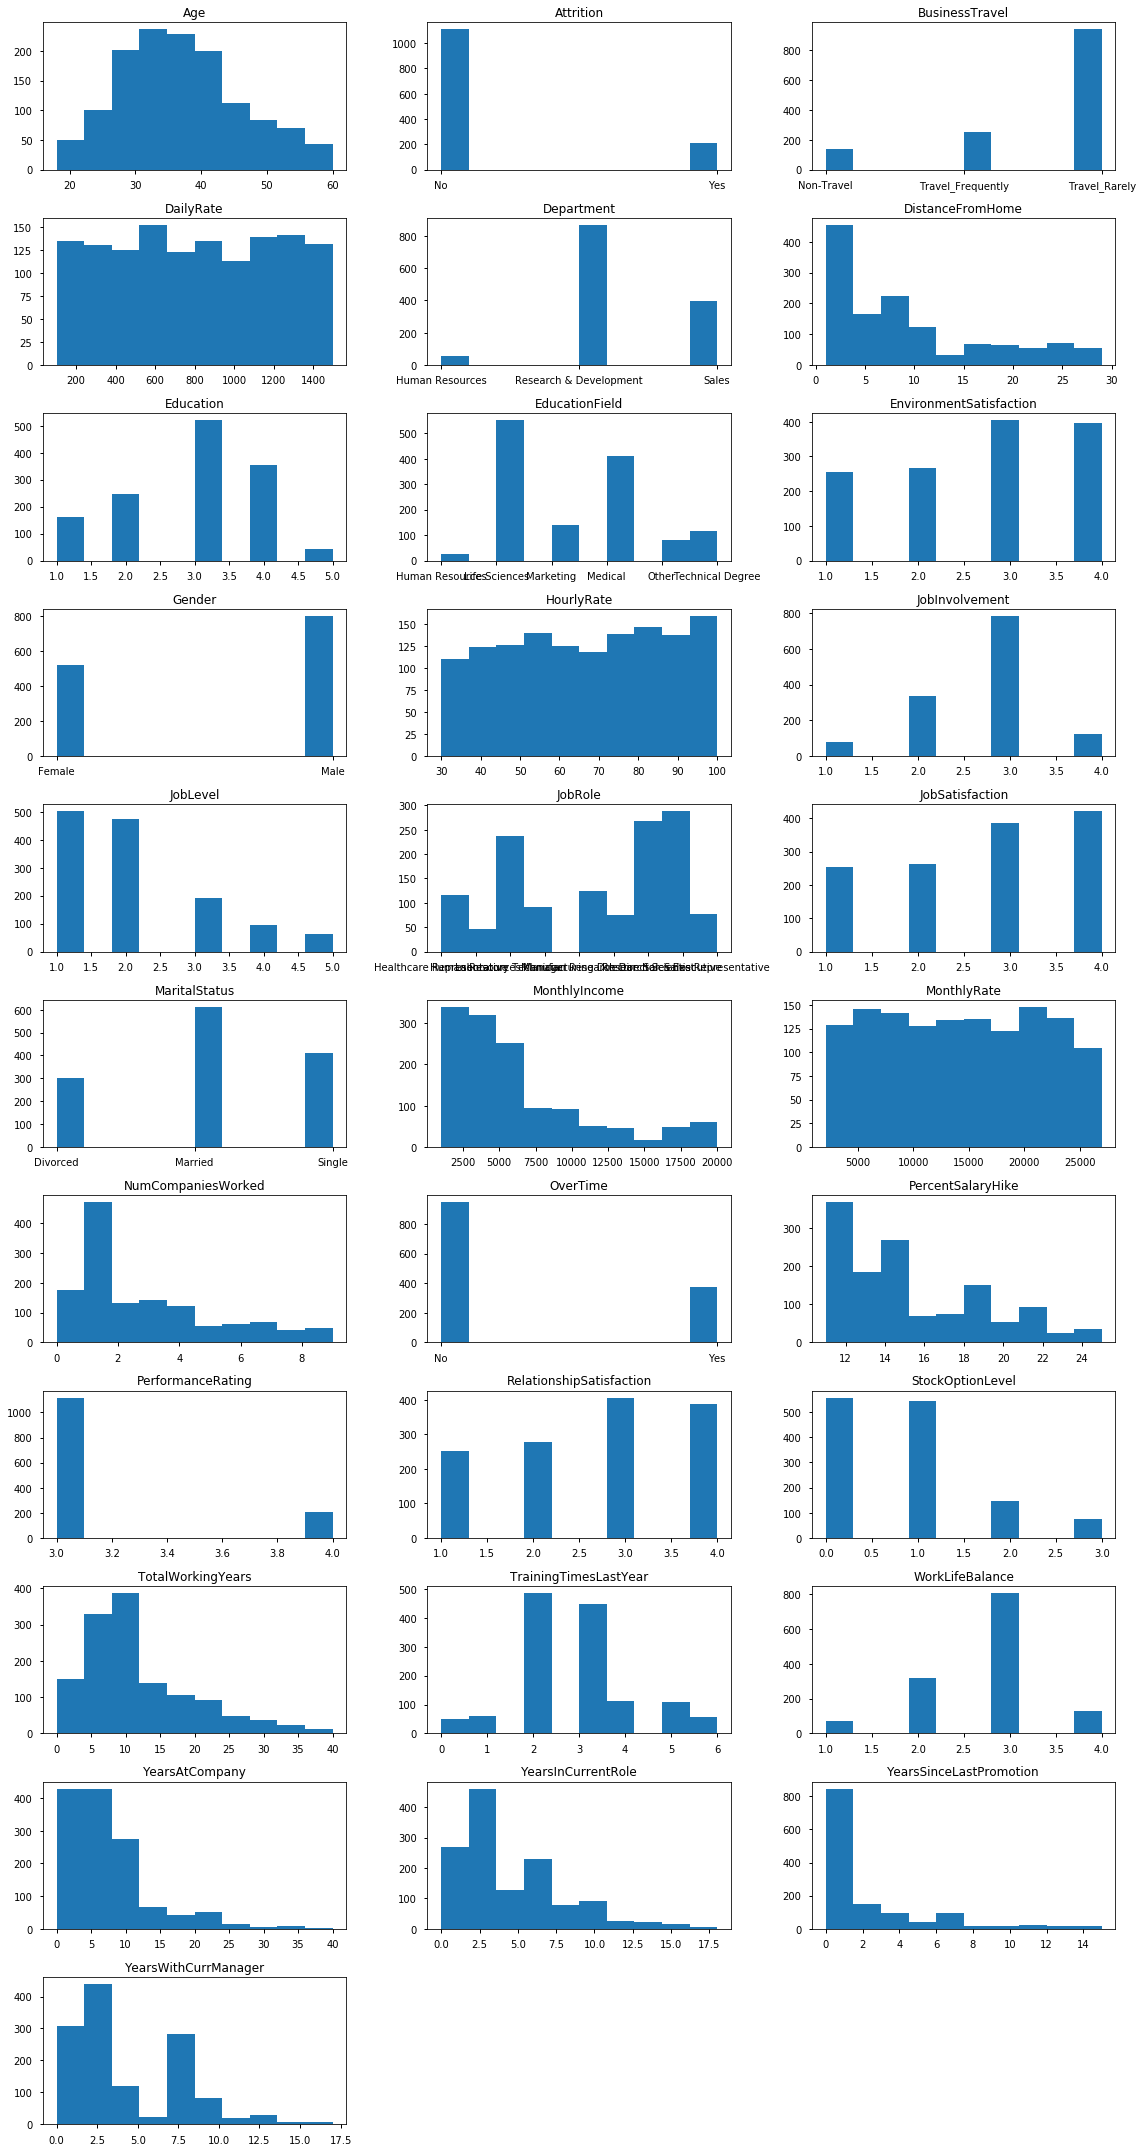

In [13]:
# Plot histogram of features
hist = plt.figure(figsize=(16,30))

n=0
for col in dftrain:
    n += 1
    ax = hist.add_subplot(11, 3, n)
    ax.set_title(col)
    ax = plt.hist(dftrain[col])
plt.tight_layout()

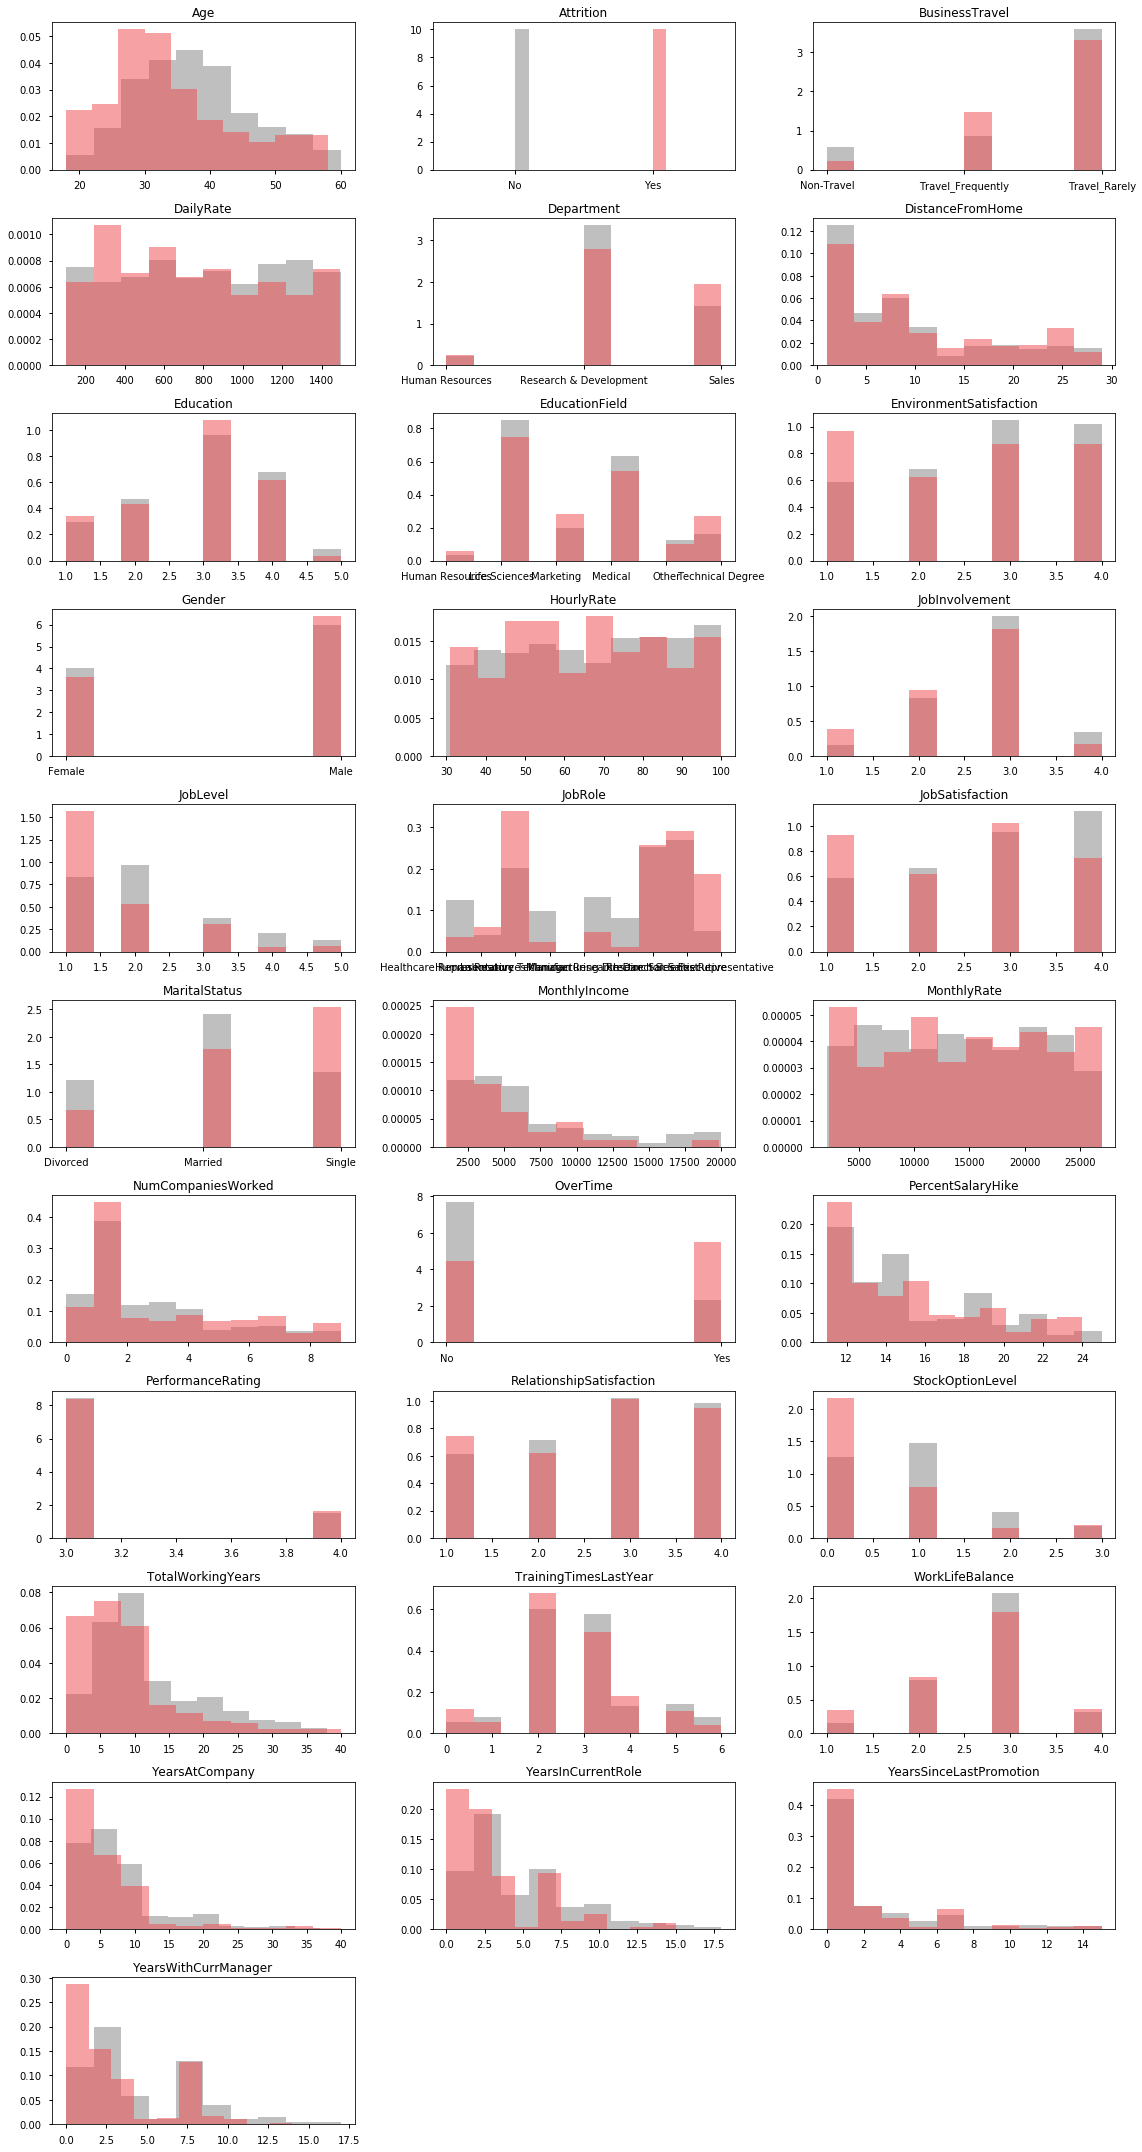

In [14]:
# How does distribution differ between the population of employees who left vs. stayed at the company?
hist = plt.figure(figsize=(16,30))

dfattrition = dftrain[dftrain['Attrition'] == "Yes"]
dfstay = dftrain[dftrain['Attrition'] == "No"]

n=0
for col in dftrain:
    n += 1
    ax = hist.add_subplot(11, 3, n)
    ax.set_title(col)
    ax = plt.hist(dfstay[col], color='grey', alpha=0.5, normed=True)
    ax = plt.hist(dfattrition[col], color='#ef464b', alpha=0.5, normed=True)
plt.tight_layout()

#### Initial Observations
- Employees who work <b style="color:rgb(239,70,75)">overtime</b> are more likley to leave
- <b style="color:rgb(239,70,75)">Younger, single</b> employees are more likley to leave (perhaps they're more expendable to their employers or their personal lives are more flexible making it easier for them to take other roles)
- <b style="color:rgb(239,70,75)">Frequent travel</b> is  linked to attrition (perhaps due to stress)
- <b style="color:rgb(239,70,75)">Sales function</b> has higher attrition than <b style="color:rgb(0,191,111)">R&D</b> (perhaps Sales skills are more transferable, while R&D knowledge is more company specific)
- Employees <b style="color:rgb(0,191,111)">living < 5 miles from office</b> are more likley to stay
- <b style="color:rgb(239,70,75)">Low satisfaction</b> (job, work-life, environment, involvement, relationships) is linked with attrition and vice versa
- <b style="color:rgb(239,70,75)">Lower job level</b> employees are more likley to leave
- Employees with the <b style="color:rgb(239,70,75)">lowest monthly income</b>, no stock options and low salary increase are more likley to leave
- <b style="color:rgb(239,70,75)">Less time in the role</b>, with the company or current manager is linked to higher churn 

#### Job role attrition analysis

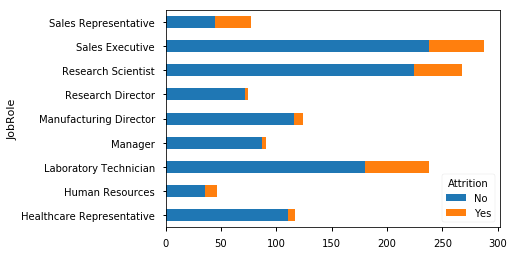

In [15]:
# Attrition by job role
dfrole = dftrain.groupby(['JobRole','Attrition'])['Attrition'].count().unstack('JobRole').T
dfrole.plot.barh(stacked=True)

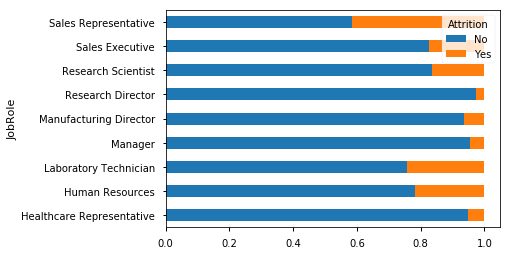

In [16]:
# Attrition percentage by job role
dftrain.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack('Attrition').plot.barh(stacked=True)

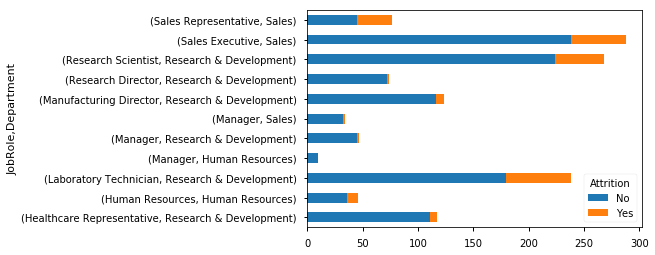

In [17]:
# Attrition by department & job role (managers roles can be in any department)
dftrain.groupby(['JobRole', 'Department'])['Attrition'].value_counts().unstack('Attrition').plot.barh(stacked=True)

#### Feature Enginering - Managers & Directors

Regardless of 'Department' or 'JobLevel', people in general managment roles (with a title of Manager or Director) are less likley to leave, than those in functional/operational roles. I will create a feature to show if an employee is a manager.

In [18]:
# Create a feature 1 if the employee is a manager or director or 0 otherwise
def mgr(role):
    if role in ('Manager','Manufacturing Director', 'Research Director'):
        return 1
    else:
        return 0

dftrain['Manager'] = dftrain['JobRole'].apply(mgr)
dftrain['Manager'].value_counts()

0    1034
1     289
Name: Manager, dtype: int64

#### Feature Engineering - Categorical Variables

In [19]:
# List string type variables
dftrain.select_dtypes(include=['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [20]:
# Attrition: No: 0, Yes: 1
dftrain['Attrition'] = np.where(dftrain['Attrition'] == 'Yes', 1, 0)

# Gender: Female: 0, Male: 1
dftrain['Gender'] = np.where(dftrain['Gender'] == 'Male', 1, 0)

# OverTime: No: 0, Yes: 1
dftrain['OverTime'] = np.where(dftrain['OverTime'] == 'Yes', 1, 0)

# BusinessTravel (Ordinal): Never: 0, Rarely: 1, Frequently: 2
businesstravel_value = {'Non-Travel':0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
dftrain['BusinessTravel'].replace(businesstravel_value, inplace=True)

# OneHotEncoder: MaritalStatus, Department, EducationField, JobRole
dummies = ['MaritalStatus', 'Department', 'EducationField', 'JobRole']
dftrain_num = pd.get_dummies(data=dftrain, columns=dummies)

dftrain_num.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
915,21,1,2,251,10,2,1,0,45,2,...,0,0,0,1,0,0,0,0,0,0
101,32,0,1,827,1,1,4,1,71,3,...,0,0,0,0,0,0,0,1,0,0
107,25,1,1,240,5,3,3,1,46,2,...,0,0,0,0,0,0,0,0,1,0
306,32,0,1,906,7,3,4,1,91,2,...,0,0,0,0,0,0,0,0,1,0
1031,46,1,1,377,9,3,1,1,52,3,...,0,0,0,0,0,0,0,0,1,0


In [21]:
dftrain_num.shape

(1323, 49)

In [22]:
dftrain_num.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Manager', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_H

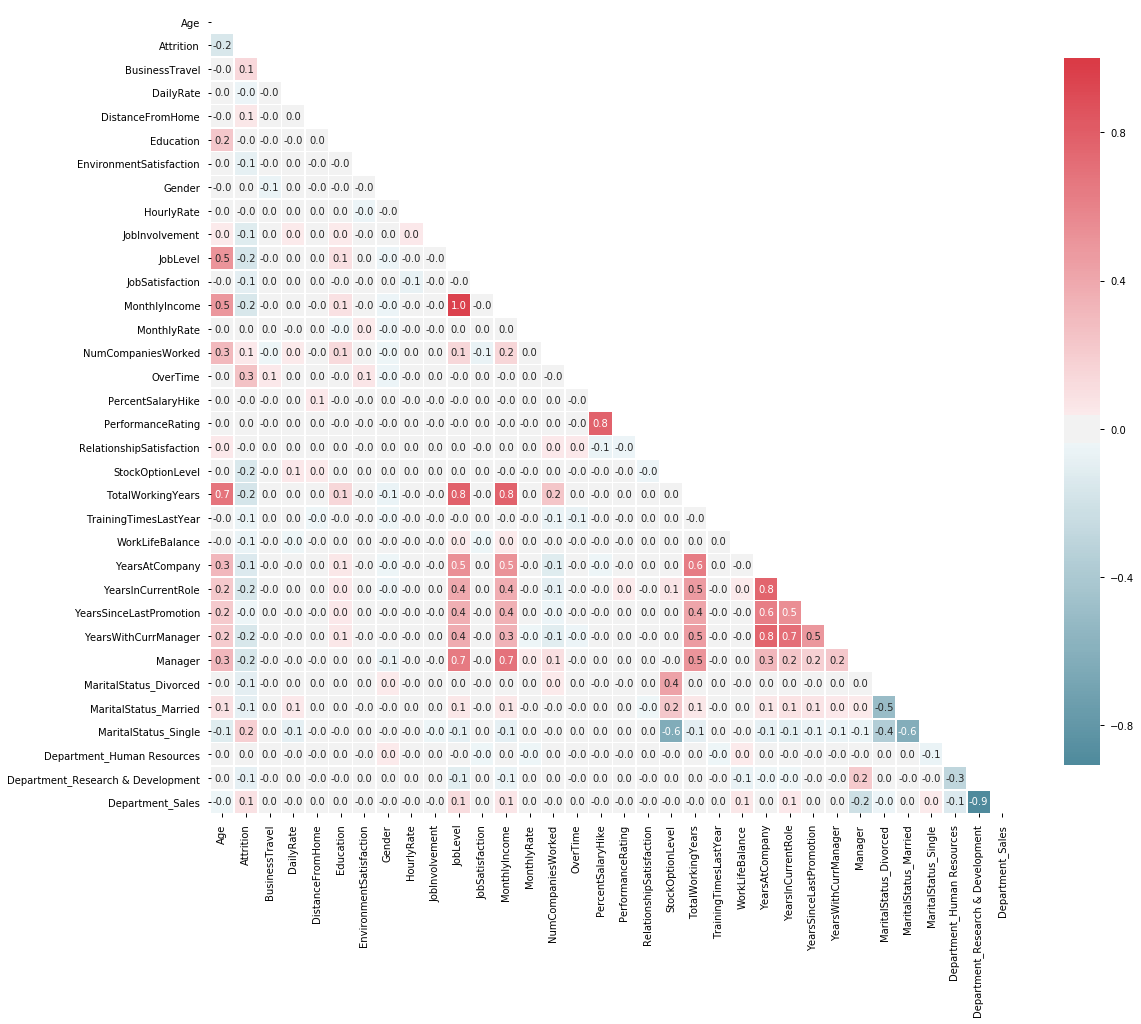

In [23]:
# Heatmap of correlation for all variables (dropped the job role and education dummy variables to save space)

dftrain_corr = dftrain_num.iloc[:,:34]

corr = dftrain_corr.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 26))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, mask=mask, 
            cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, 
            annot=True, fmt='.1f', cbar_kws={"shrink": .5})

The correlation matrix shows that there is no single variable that is highly correlated with attrition, the strongest correlation is overtime. We will need to look for a combination of variables that drive attrition

The corelation matrix also shows that several features are very strongly correlated e.g. monthly income and job level; age and total working years etc.

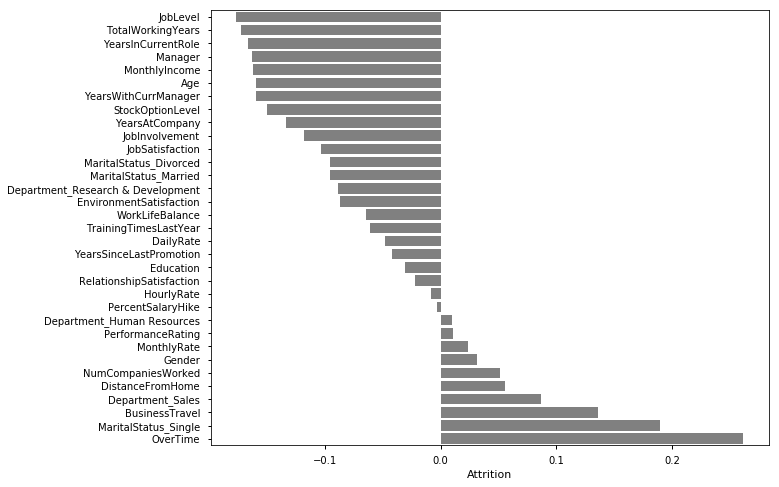

In [24]:
# Correlation strength
plt.figure(figsize=(10,8))
cr_df = corr.sort_values(by=['Attrition'])
sns.barplot(x=cr_df['Attrition'].drop('Attrition'), y=cr_df['Attrition'].drop('Attrition').index, color='grey')

#### Summary

A more statistical analysis of the correlation between features shows a similar picture to the histograms:

EDA shows us that employees who work under more stressful circumstances (overtime, frequent travel, low job satisfaction, long commutes) without high compensation or benefits are more likley to leave the company. There is also a demographic factor; younger employees without family ties are also more likley to leave than middle aged employees with families.

These findings are unsurprising, however the EDA has given us a clearer & better quantified understanding of the relative importances of these variables.

<a id="feature-matrix"></a>
### <span style="color: #63666a">Feature Matrix</span>

To generate a quick initial model I will use the following features:
- OverTime
- MaritalStatus_Single
- Department_Sales
- DistanceFromHome
- Age
- MonthlyIncome
- Manager
- JobInvolvement

In [28]:
dftrain_num.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
915,21,1,2,251,10,2,1,0,45,2,...,0,0,0,1,0,0,0,0,0,0
101,32,0,1,827,1,1,4,1,71,3,...,0,0,0,0,0,0,0,1,0,0
107,25,1,1,240,5,3,3,1,46,2,...,0,0,0,0,0,0,0,0,1,0
306,32,0,1,906,7,3,4,1,91,2,...,0,0,0,0,0,0,0,0,1,0
1031,46,1,1,377,9,3,1,1,52,3,...,0,0,0,0,0,0,0,0,1,0


In [29]:
X = dftrain_num.drop(['Attrition'], axis=1)
y = dftrain_num['Attrition']

print(X.shape)
print(y.shape)

(1323, 48)
(1323,)


<a id="import-models"></a>
### <span style="color: #63666a">Import Models</span>

In [30]:
# Modelling library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
# Visualize decision tree outputs
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# initialize the output file object
dot_data = StringIO() 

def build_tree_image(model,dot_data):
    export_graphviz(model, 
                out_file = dot_data,  
                filled = True, 
                rounded = True,
                special_characters = True,
                feature_names = X.columns)  

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return graph

In [31]:
# define function to graphically plot confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<a id="baseline-model"></a>
### <span style="color: #63666a">Baseline Model</span>

In [32]:
dftrain_num['Attrition'].value_counts(normalize=True)

0    0.838246
1    0.161754
Name: Attrition, dtype: float64

The baseline model for this dataset is to predict the most common label: Attrition = No. Given the low correlations between ony single variable and attrition, it's unlikley that any simple model using only a single variable would perform much better than the baseline model - making this an intersting & worthwile problem for machine learning. 

Results:
- 84% accuracy 
- 0% precision 
- 0% recall
- 0.5 roc_auc

Given that we are particularly interested in predicting & preventing attrition this model, while quite accurate, is not useful.

<a id="initial-model"></a>
### <span style="color: #63666a">Initial Model</span>

In [33]:
# Create a decisions tree classified with a max depth of 3 layers and minimum 5 samples per leaf
model = DecisionTreeClassifier(max_depth=5,
                              min_samples_leaf = 10)
    
# Fit the model
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
# Visualize the decision tree
dot_data = StringIO()
graph = build_tree_image(model, dot_data)
Image(graph.create_png())

<a id="results-summary"></a>
### <span style="color: #63666a">Results Summary</span>

In [ ]:
# Display cross-validated and mean scores for the initial model
for scoring in ['roc_auc','accuracy','recall','precision']:
    scores = cross_val_score(model, X, y, scoring=scoring)
    print( scoring, ':')
    print('CV {} {}, Average {} {}'.format(scoring,scores,scoring,scores.mean()))

In [ ]:
# Show feature importance for the model
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

This initial model is slightly more accurate than the baseline. However, there is clearly a lot of improvement opportunity; average reall is only 30% meaning we failed to predict 70% of the employees who actually left the company. 

The decision tree relies heavily on monthly income, overtime and marital status to generate it's predictions.

<a id="parameter-tuning"></a>
### <span style="color: #63666a">Parameter Tuning</span>

In this section I will use grid-search cross-validation to try a range of parameters and maximize roc_auc

In [ ]:
# Create another decision tree classifier
model_gscv = DecisionTreeClassifier()

# Try depth from 1 to 10 levels and minimum leaf samples from 1 to 10
params = {'max_depth': range(1,11),
          'min_samples_leaf': range(1,11)}

# Perform 3 fold CV grid search with parameters specified
gs = GridSearchCV(model_gscv, param_grid=params, scoring='roc_auc')
gs.fit(X,y)

In [ ]:
gs.best_estimator_.get_params

the best estimator allows a max depth of 4 and 5 samples minimum per leaf node

In [ ]:
# Visualize the decision tree for the best estimater found during grid search
dot_data = StringIO()
graph = build_tree_image(gs.best_estimator_, dot_data)
Image(graph.create_png())

The best estimated model starts similar to the the earlier model, first separating the samples by overtime Yes/No and then by level of income

In [ ]:
# Show cross-val and mean scores for the best estimator found
for scoring in ['roc_auc','accuracy','recall','precision']:
    scores = cross_val_score(gs.best_estimator_, X, y, scoring=scoring)
    print( scoring, ':')
    print('CV {} {}, Average {} {}'.format(scoring,scores,scoring,scores.mean()))

In [ ]:
# Plot the confusion matrix for the best estimator
y_pred = gs.best_estimator_.predict(X)
cm = confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, ['No','Yes'])